## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.458314 -0.389325 -0.776853 -0.320715 -1.639587 -1.620702
1  1.345117  1.452410 -1.020532  1.676112  1.429818  0.776936
2 -0.824868 -0.868373  0.364390  0.966225  0.793744 -0.076893
3 -0.202558  0.022217 -0.430816 -1.606058  1.358536 -0.443147
4  0.286014 -0.622035  0.105580  0.506711  0.593530  0.307392


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0062212	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9962206	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9845243	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9754621	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9660010	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9562179	total: 59.6ms	remaining: 9.88s
6:	learn: 0.9467353	total: 60.1ms	remaining: 8.52s
7:	learn: 0.9359048	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9277333	total: 61.7ms	remaining: 6.79s
9:	learn: 0.9192496	total: 62.1ms	remaining: 6.15s
10:	learn: 0.9108036	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8994185	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8884516	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8790683	total: 64ms	remaining: 4.51s
14:	learn: 0.8704910	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8618517	total: 65ms	remaining: 4s
16:	learn: 0.8542483	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8461998	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8388193	total: 66.4ms	remaining: 3.43s


111:	learn: 0.3849848	total: 109ms	remaining: 865ms
112:	learn: 0.3822700	total: 110ms	remaining: 860ms
113:	learn: 0.3796176	total: 110ms	remaining: 854ms
114:	learn: 0.3767545	total: 110ms	remaining: 850ms
115:	learn: 0.3738484	total: 111ms	remaining: 846ms
116:	learn: 0.3709376	total: 111ms	remaining: 841ms
117:	learn: 0.3682074	total: 112ms	remaining: 838ms
118:	learn: 0.3658685	total: 113ms	remaining: 834ms
119:	learn: 0.3628548	total: 113ms	remaining: 829ms
120:	learn: 0.3605919	total: 114ms	remaining: 825ms
121:	learn: 0.3582870	total: 114ms	remaining: 822ms
122:	learn: 0.3556099	total: 115ms	remaining: 818ms
123:	learn: 0.3531202	total: 115ms	remaining: 815ms
124:	learn: 0.3504017	total: 116ms	remaining: 811ms
125:	learn: 0.3477490	total: 116ms	remaining: 807ms
126:	learn: 0.3450018	total: 117ms	remaining: 803ms
127:	learn: 0.3421602	total: 117ms	remaining: 798ms
128:	learn: 0.3391260	total: 118ms	remaining: 796ms
129:	learn: 0.3368637	total: 118ms	remaining: 791ms
130:	learn: 

274:	learn: 0.1261126	total: 187ms	remaining: 492ms
275:	learn: 0.1254393	total: 187ms	remaining: 491ms
276:	learn: 0.1247743	total: 188ms	remaining: 490ms
277:	learn: 0.1238648	total: 188ms	remaining: 489ms
278:	learn: 0.1229561	total: 188ms	remaining: 487ms
279:	learn: 0.1223409	total: 189ms	remaining: 486ms
280:	learn: 0.1215547	total: 189ms	remaining: 484ms
281:	learn: 0.1209691	total: 190ms	remaining: 483ms
282:	learn: 0.1201053	total: 190ms	remaining: 482ms
283:	learn: 0.1195058	total: 191ms	remaining: 481ms
284:	learn: 0.1185964	total: 191ms	remaining: 480ms
285:	learn: 0.1180055	total: 192ms	remaining: 479ms
286:	learn: 0.1174209	total: 192ms	remaining: 478ms
287:	learn: 0.1169967	total: 193ms	remaining: 476ms
288:	learn: 0.1163316	total: 193ms	remaining: 475ms
289:	learn: 0.1155085	total: 194ms	remaining: 474ms
290:	learn: 0.1146945	total: 194ms	remaining: 473ms
291:	learn: 0.1141123	total: 194ms	remaining: 471ms
292:	learn: 0.1134059	total: 195ms	remaining: 470ms
293:	learn: 

492:	learn: 0.0441338	total: 292ms	remaining: 301ms
493:	learn: 0.0440848	total: 293ms	remaining: 300ms
494:	learn: 0.0438378	total: 293ms	remaining: 299ms
495:	learn: 0.0437957	total: 294ms	remaining: 299ms
496:	learn: 0.0437482	total: 294ms	remaining: 298ms
497:	learn: 0.0435694	total: 295ms	remaining: 297ms
498:	learn: 0.0435287	total: 296ms	remaining: 297ms
499:	learn: 0.0432944	total: 296ms	remaining: 296ms
500:	learn: 0.0430124	total: 297ms	remaining: 295ms
501:	learn: 0.0427896	total: 297ms	remaining: 295ms
502:	learn: 0.0425161	total: 297ms	remaining: 294ms
503:	learn: 0.0423122	total: 298ms	remaining: 293ms
504:	learn: 0.0421284	total: 298ms	remaining: 292ms
505:	learn: 0.0418861	total: 299ms	remaining: 292ms
506:	learn: 0.0415965	total: 299ms	remaining: 291ms
507:	learn: 0.0415528	total: 300ms	remaining: 290ms
508:	learn: 0.0413976	total: 300ms	remaining: 290ms
509:	learn: 0.0413547	total: 301ms	remaining: 289ms
510:	learn: 0.0411896	total: 301ms	remaining: 288ms
511:	learn: 

656:	learn: 0.0267893	total: 370ms	remaining: 193ms
657:	learn: 0.0266961	total: 371ms	remaining: 193ms
658:	learn: 0.0266257	total: 371ms	remaining: 192ms
659:	learn: 0.0265121	total: 372ms	remaining: 191ms
660:	learn: 0.0264177	total: 372ms	remaining: 191ms
661:	learn: 0.0263228	total: 372ms	remaining: 190ms
662:	learn: 0.0262248	total: 373ms	remaining: 190ms
663:	learn: 0.0261644	total: 374ms	remaining: 189ms
664:	learn: 0.0261051	total: 374ms	remaining: 188ms
665:	learn: 0.0260803	total: 375ms	remaining: 188ms
666:	learn: 0.0260094	total: 375ms	remaining: 187ms
667:	learn: 0.0259402	total: 376ms	remaining: 187ms
668:	learn: 0.0259242	total: 376ms	remaining: 186ms
669:	learn: 0.0259084	total: 377ms	remaining: 185ms
670:	learn: 0.0258140	total: 377ms	remaining: 185ms
671:	learn: 0.0257985	total: 378ms	remaining: 184ms
672:	learn: 0.0256897	total: 378ms	remaining: 184ms
673:	learn: 0.0256752	total: 379ms	remaining: 183ms
674:	learn: 0.0255854	total: 379ms	remaining: 183ms
675:	learn: 

873:	learn: 0.0140988	total: 475ms	remaining: 68.5ms
874:	learn: 0.0140316	total: 476ms	remaining: 68ms
875:	learn: 0.0139634	total: 476ms	remaining: 67.4ms
876:	learn: 0.0138975	total: 477ms	remaining: 66.9ms
877:	learn: 0.0138598	total: 478ms	remaining: 66.4ms
878:	learn: 0.0137952	total: 478ms	remaining: 65.8ms
879:	learn: 0.0137286	total: 479ms	remaining: 65.3ms
880:	learn: 0.0136651	total: 479ms	remaining: 64.7ms
881:	learn: 0.0136285	total: 479ms	remaining: 64.1ms
882:	learn: 0.0135770	total: 480ms	remaining: 63.6ms
883:	learn: 0.0135128	total: 480ms	remaining: 63ms
884:	learn: 0.0134507	total: 481ms	remaining: 62.5ms
885:	learn: 0.0134084	total: 482ms	remaining: 62ms
886:	learn: 0.0133928	total: 482ms	remaining: 61.4ms
887:	learn: 0.0133320	total: 482ms	remaining: 60.9ms
888:	learn: 0.0132690	total: 483ms	remaining: 60.3ms
889:	learn: 0.0132228	total: 483ms	remaining: 59.8ms
890:	learn: 0.0131614	total: 484ms	remaining: 59.2ms
891:	learn: 0.0131342	total: 485ms	remaining: 58.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

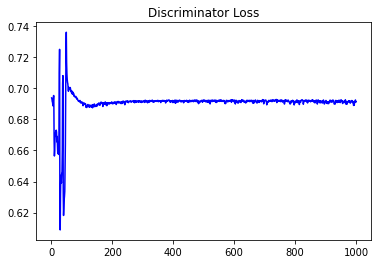

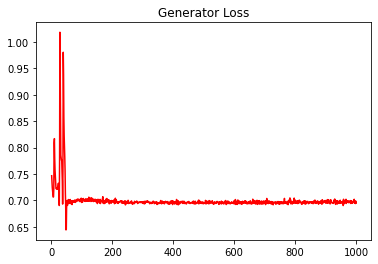

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03420650547095201


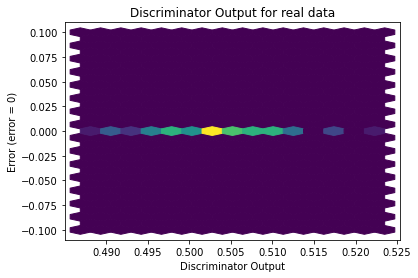

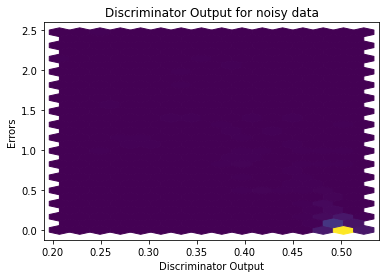

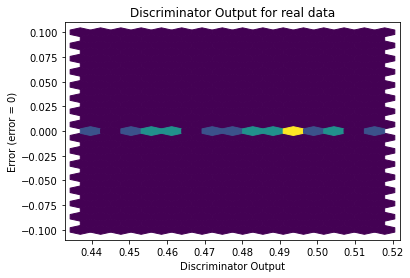

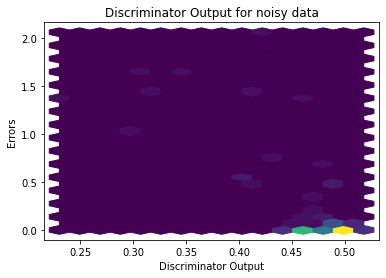

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


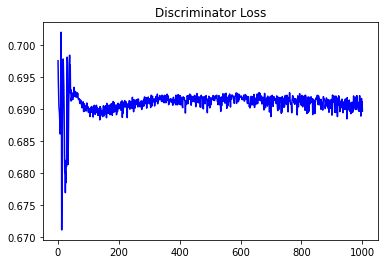

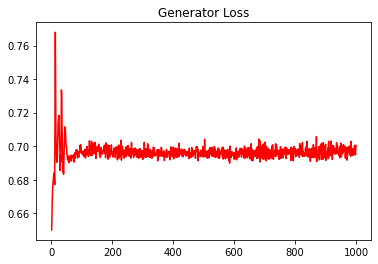

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02965892778947484


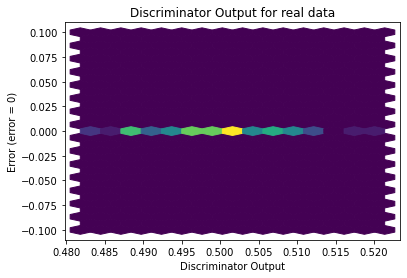

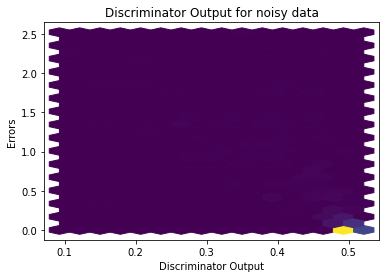

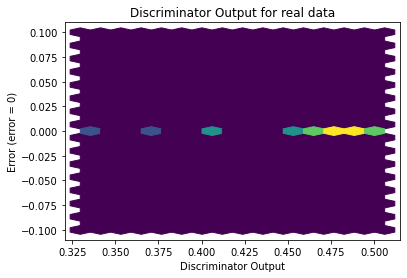

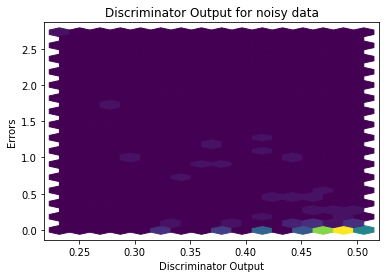

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6613]], requires_grad=True)
